In [1]:
import requests
from pathlib import Path
from tqdm import tqdm
import multiprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# download the dataset (train and test files)

data_path = Path('') / 'data'
data_path.mkdir(exist_ok=True)

def get_file(file_name):
    base_url = 'http://ps2.railsreactor.net/datasets/medicine/'
    file_url =   base_url + file_name
    file_content = requests.get(file_url).text
    with open(data_path / file_name, 'w+', encoding='utf-8') as output_file:
        output_file.write(file_content)


def get_data():
    file_names = [
        'heart_test.csv',
        'heart_train.csv',
    ]
    with multiprocessing.Pool(2) as pool:
        list(tqdm(pool.imap(get_file, file_names), total=len(file_names)))
        
get_data()

100%|██████████| 2/2 [00:00<00:00,  7.44it/s]


In [5]:
import pandas as pd

In [6]:
# load and concatenate those datasets via pandas

df_train = pd.read_csv('./data/heart_train.csv')
df_test = pd.read_csv('./data/heart_test.csv')
df = pd.concat([df_train, df_test])

In [7]:
# print the dataset size and first rows from the dataset

print(df.shape)
df.head(5)

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
1,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
2,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
3,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [8]:
# print the lists of numeric, categorical and boolean columns
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
bool_cols = df[['sex', 'fbs', 'exang', 'target']]
print('boolean columns')
bool_cols.head()

boolean columns


,sex,fbs,exang,target
0,0,0,0,1
1,1,0,1,0
2,0,0,1,0
3,1,0,1,0
4,0,1,0,1


In [10]:
numeric_cols = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
print('numeric columns')
numeric_cols.head()

numeric columns


,age,trestbps,chol,thalach,oldpeak
0,69,140,239,151,1.8
1,66,160,246,120,0.0
2,55,128,205,130,2.0
3,57,110,335,143,3.0
4,71,110,265,130,0.0


In [11]:
categorical_columns = df[['cp', 'restecg', 'slope', 'ca', 'thal']]
print('categorical columns')
categorical_columns.head()

categorical columns


,cp,restecg,slope,ca,thal
0,3,1,2,2,2
1,1,1,1,3,1
2,0,2,1,1,3
3,0,1,1,1,3
4,2,0,2,1,2


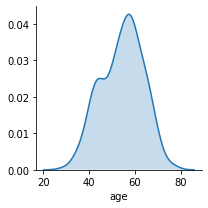

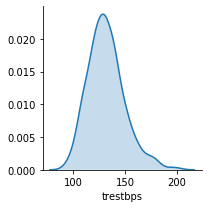

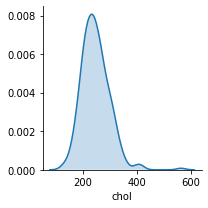

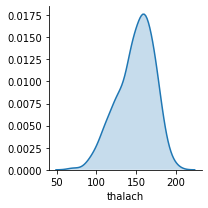

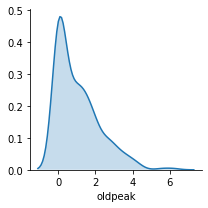

In [12]:
# analyze values distribution for each numerical column

for var in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    g = sns.FacetGrid(df)
    g.map(sns.kdeplot, var, shade=True);

In [13]:
# analyze frequency distribution of values for each categorical and boolean columns

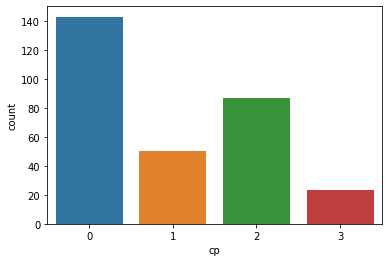

In [14]:
sns.countplot(x='cp', data=df)

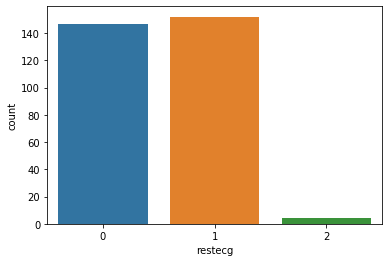

In [15]:
sns.countplot(x='restecg', data=df)

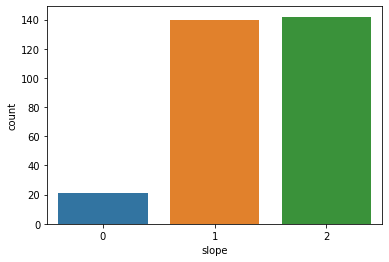

In [16]:
sns.countplot(x='slope', data=df)

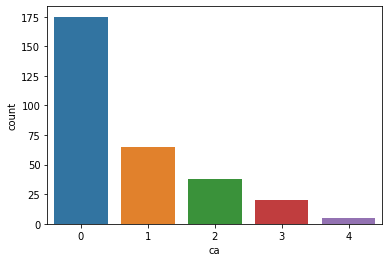

In [17]:
sns.countplot(x='ca', data=df)

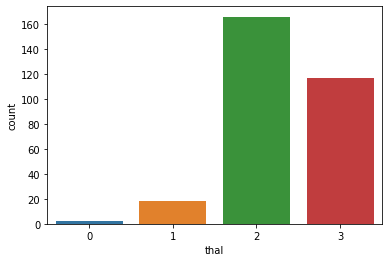

In [18]:
sns.countplot(x='thal', data=df)

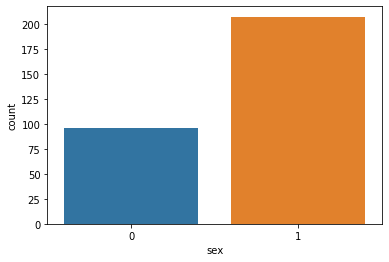

In [19]:
sns.countplot(x='sex', data=df)

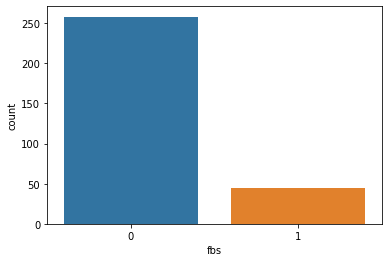

In [20]:
sns.countplot(x='fbs', data=df)

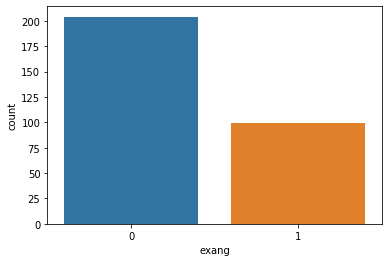

In [21]:
sns.countplot(x='exang', data=df)

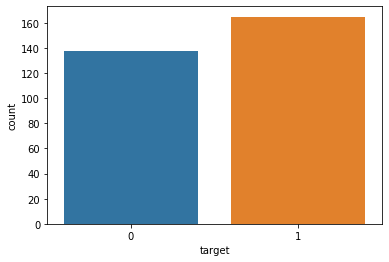

In [22]:
sns.countplot(x='target', data=df)

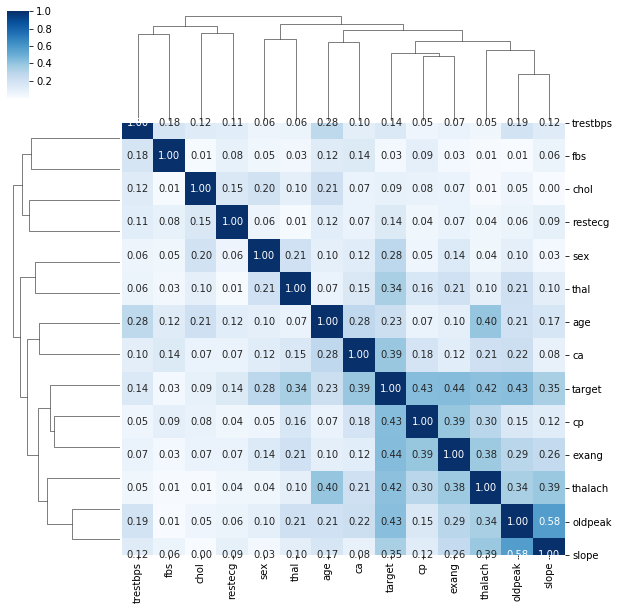

In [23]:
# analyze correlation between columns
sns.clustermap(data = df.corr().abs(), annot=True, fmt = ".2f", cmap = 'Blues');

In [24]:
# perform preprocessing if needed (standardization, encodings etc)

In [30]:
# generate automatic report for the dataset via pandas_profiling library
import pandas_profiling
profile = pandas_profiling.ProfileReport(df=df)
profile.to_file(Path('') / 'heart_profile.html')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 60
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 45.5 KB
